In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [23]:
# for now load the vanilla history file
fname = "/home/paradox/.bash_history"

In [24]:
data = []

In [25]:
with open(fname) as f:
    for line in f:
        data.append(line.strip())

In [26]:
df = pd.DataFrame(data, columns=['command_text'])

In [27]:
df.head()

,command_text
0,ls
1,cd paradox-configs/
2,ls
3,cd
4,ls


In [28]:
df.shape

(4973, 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4973 entries, 0 to 4972
Data columns (total 1 columns):
command_text    4973 non-null object
dtypes: object(1)
memory usage: 38.9+ KB


In [30]:
df.describe()

,command_text
count,4973
unique,1304
top,ls
freq,1000


In [31]:
# here we extract only the base command part of the whole command
def extract_command(text):
    tokens = text.split()
    return '' if not tokens else tokens[0]

In [32]:
df['command'] = df['command_text'].apply(extract_command)

In [33]:
df.head()

,command_text,command
0,ls,ls
1,cd paradox-configs/,cd
2,ls,ls
3,cd,cd
4,ls,ls


## histogram plot

In [34]:
# get unique commands
unique = df['command'].unique()
print(unique.shape)
print(unique)

(197,)
['ls' 'cd' 'nvim' 'whereis' 'which' 'sudo' 'acpi' 'temperature.sh'
 'sensorrs' 'sensors' 'alsamixer' 'cat/proc/asound/cards' 'cat'
 'asoundconf' 'startx' 'reboot' 'alsactl' 'speaker-test' 'adduser'
 '/usr/sbin/adduser' 'useradd' 'ifconfig' 'gnome-terminal' 'df' 'yay'
 'xterm' 'urxvt' 'urxvt-tabbed' 'rip' 'pwd' 'compton' 'pacman' 'uname'
 'inxi' 'fakeroot' '\x01' 'fwupdmgr' 'flashrom' 'htop' 'glxinfo' 'source'
 'd' 'jupyter' 'xset' 'unzip' 'pkill' 'pip' 'python' 'playx' 'mpv' 'conda'
 't' 'git' 'catless' 'vim' '/etc/hos' 'lsls' 'sls' 'apython' 'chmod'
 './manage.py' '/usr/bin/env' 'glxgears' 'mperceppt' 'up' 'find'
 'youtube-dl' 'fg' 'lyrics.py' 'nviim' 'mkdir' 'mv' 'fdisk'
 'android-file-transfer' 'cp' 'scrot' 'gpicview' 'thunar' 'gedit' 'लस'
 'fgk' 'LS' 'make' './darknet' '' './make' './darknet/' 'rm' 'md5'
 'md5sum' 'libopencv-dev' 'redshift-gtk' 'p' 'systemctl'
 '/usr/bin/redshift-gtk' 'screen-eat' './screen-eat' 'ffmpeg' 'locate'
 'python2' 'mportError:' '.nstall' 'wget' 'ns

In [35]:
# count each command
df['command'].value_counts()

ls                                     1008
cd                                      683
git                                     472
python                                  414
fg                                      332
nvim                                    314
sudo                                    199
up                                      111
pip                                     110
source                                  106
./darknet                                71
playx                                    61
xset                                     60
jupyter                                  58
startx                                   54
which                                    50
rip                                      50
ssh                                      49
pwd                                      41
scp                                      39
./dothis.sh                              35
mkdir                                    34
conda                           

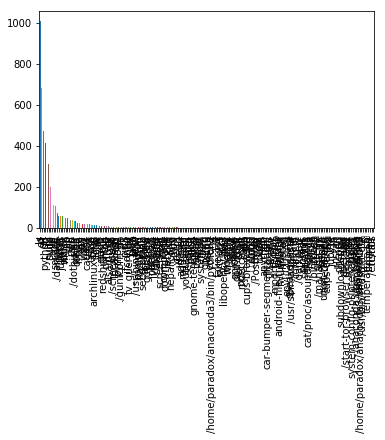

In [36]:
# get histogram plot
df['command'].value_counts().plot(kind='bar')

In [37]:
figsize = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize'] = [15, 10]

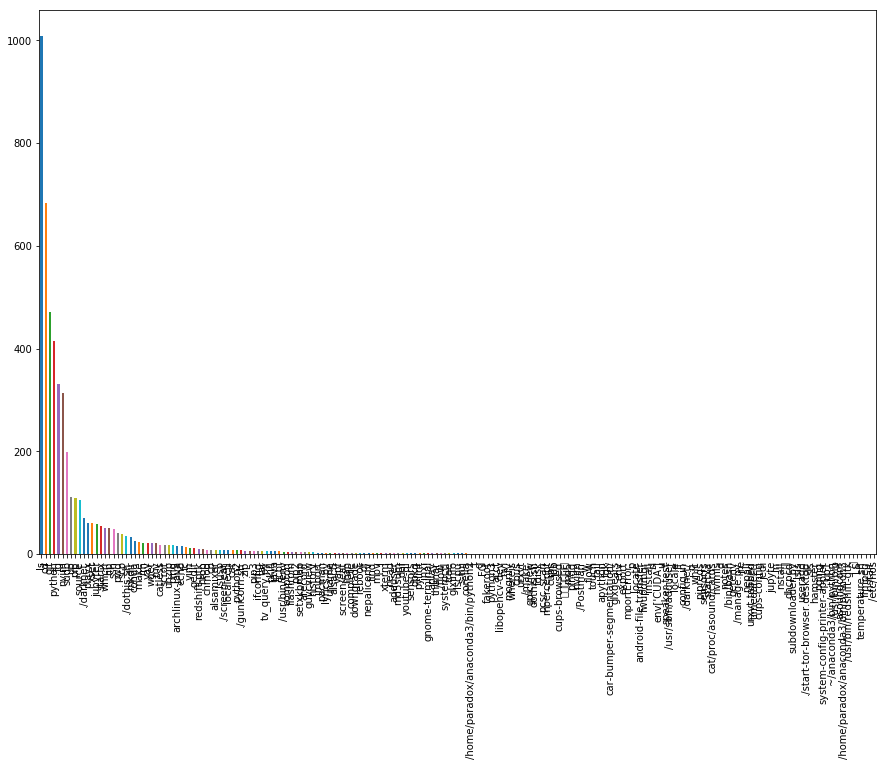

In [39]:
# histogram plot -> bigger size
df['command'].value_counts().plot(kind='bar')

# top N mostly used commands

In [44]:
n = 20
df['command'].value_counts()[:n]

ls           1008
cd            683
git           472
python        414
fg            332
nvim          314
sudo          199
up            111
pip           110
source        106
./darknet      71
playx          61
xset           60
jupyter        58
startx         54
which          50
rip            50
ssh            49
pwd            41
scp            39
Name: command, dtype: int64

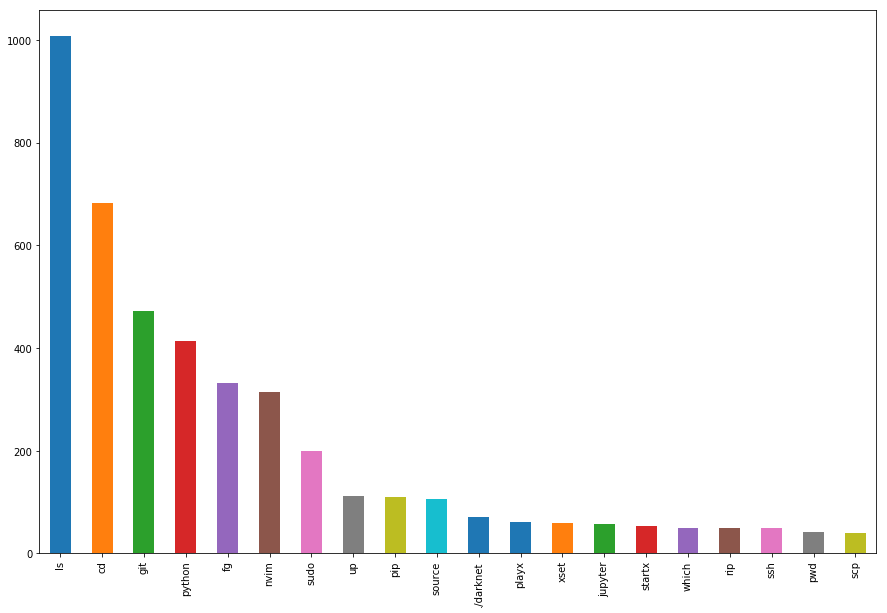

In [45]:
# histogram plot -> bigger size
df['command'].value_counts()[:n].plot(kind='bar')

### Analysis!
So, I use `ls`, `cd`, `git`, `python`, `fg` and `nvim` the most.  
I guess it's self-implied because most of the code I write is in python and not to forget my love for **vim**.  

You might be thinking, why `fg` (foreground) is also one of the top commands. For me, I tend to execute python scripts by just letting my editor (vim) run in background and then run the python shell. When I'm done, I let the editor come to the foreground again.  

The process in a nutshell is:
- open vim
- code
- do `ctrl+z` to let vim go into the backgroun. This lets me use the bash shell.
- run whatever code I have written
- hit `fg` by letting the vim process come into the foreground again.

:P
Cheers...

# least used commands

In [20]:
n = 20

In [21]:
n = 20
df['command'].value_counts()[-n:]

apython                                1
whereis                                1
mportError:                            1
/usr/bin/redshift-gtk                  1
ffmpeg                                 1
/home/paradox/anaconda3/bin/python2    1
~/anaconda3/bin/python                 1
nvi                                    1
ln                                     1
nvimls                                 1
cat/proc/asound/cards                  1
./manage.py                            1
LS                                     1
sensorrs                               1
speaker-test                           1
urxvt                                  1
p                                      1
jdb                                    1
lsls                                   1
install                                1
Name: command, dtype: int64

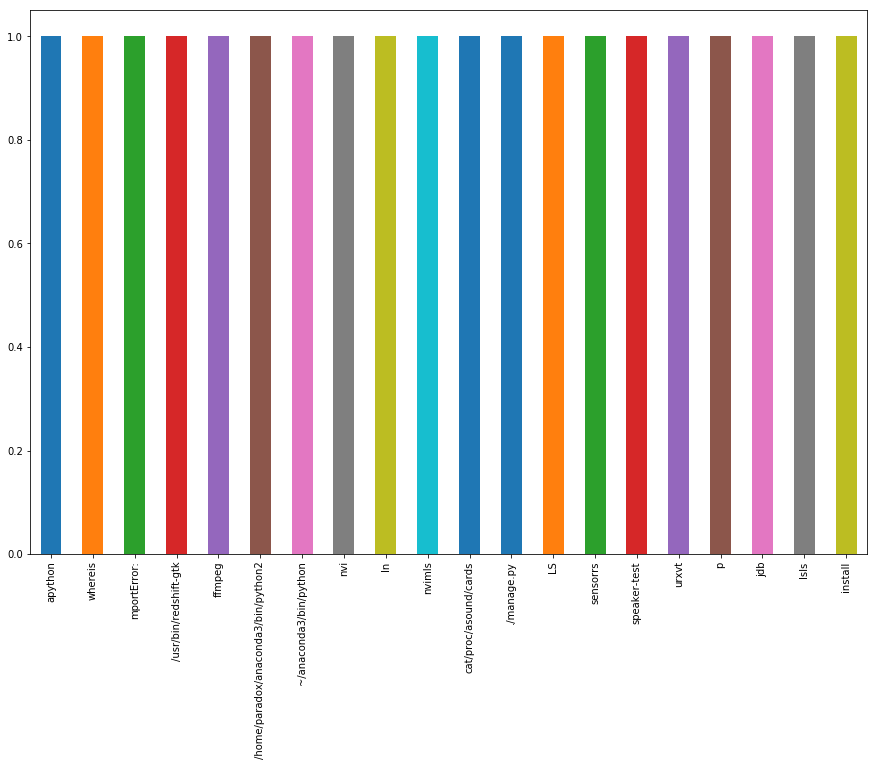

In [22]:
# histogram plot -> bigger size
df['command'].value_counts()[-n:].plot(kind='bar')